___@joanvelro (joseangel.velasco@yahoo.es)___

___Jan. 2021___





# Dimensionality Reduction


In [2]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import cholesky
sns.set_theme(style="ticks")
import plotly.express as px

# Import data

In [4]:
X, _ = load_digits(return_X_y=True)
print('original dimension:', X.shape)
df_x = pd.DataFrame(data=X)

df_x.sort_index(level=0, ascending=False, inplace=True)


original dimension: (1797, 64)


In [5]:
df_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,16.0,14.0,6.0,1.0,0.0,0.0,0.0,0.0,15.0,15.0,8.0,15.0,0.0,0.0,0.0,0.0,5.0,16.0,16.0,10.0,0.0,0.0,0.0,0.0,12.0,15.0,15.0,12.0,0.0,0.0,0.0,4.0,16.0,6.0,4.0,16.0,6.0,0.0,0.0,8.0,16.0,10.0,8.0,16.0,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0


In [6]:
df_x.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


In [54]:
fig = go.Figure()
for i in df_x.columns:
  fig.add_trace(go.Box(y=df_x.loc[:,i]))
fig.show()

# Detect null features

In [42]:
null_features = []
for column in df_x.columns:
  if (df_x.loc[:,column]==0).all():
    null_features.append(column)

In [34]:
no_null_features = set(df_x.columns).difference(set(null_features))

# slice null features

In [39]:
df_x2 = df_x.loc[:,np.array(no_null_features)]
df_x2.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
4,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
3,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
2,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
1,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


# Normalize features

In [47]:
df_x2 = df_x2.apply(lambda col: (col-np.min(col))/(np.max(col)-np.min(col)) , axis=1)

In [50]:
df_x2.shape

(1797, 61)

In [53]:
fig = go.Figure()
for i in df_x2.columns:
  fig.add_trace(go.Box(y=df_x2.loc[:,i]))
fig.show()

Text(0.5, 1.0, 'Covariance')

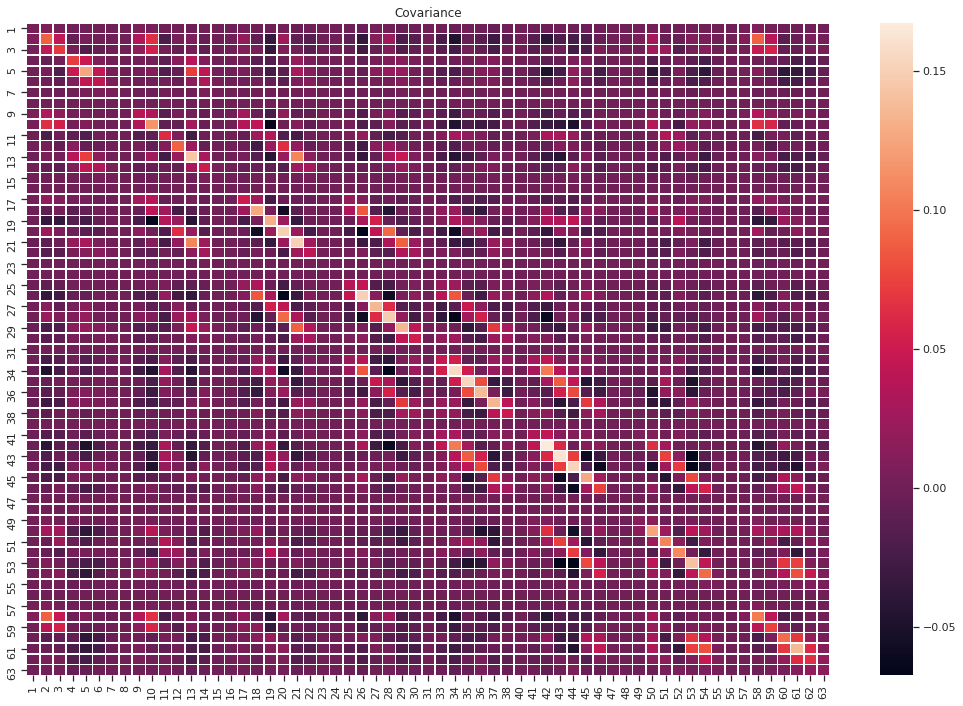

In [48]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_x2.cov(), linewidths=.5, ax=ax)
ax.set_title('Covariance')

# Calculate Covariance and correlation matrix

Text(0.5, 1.0, 'Covariance')

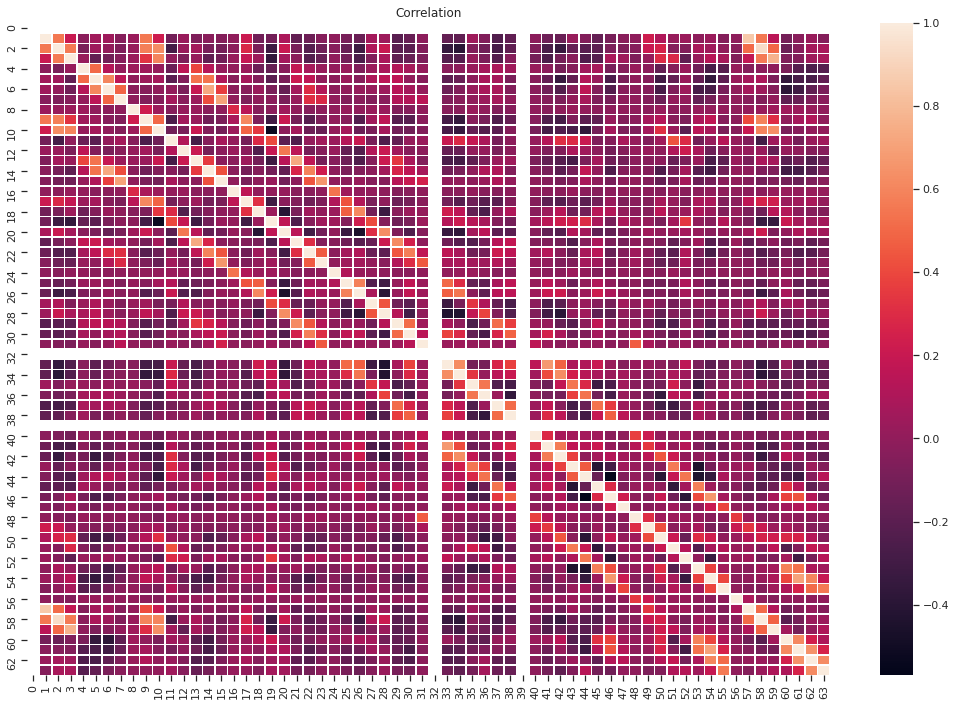

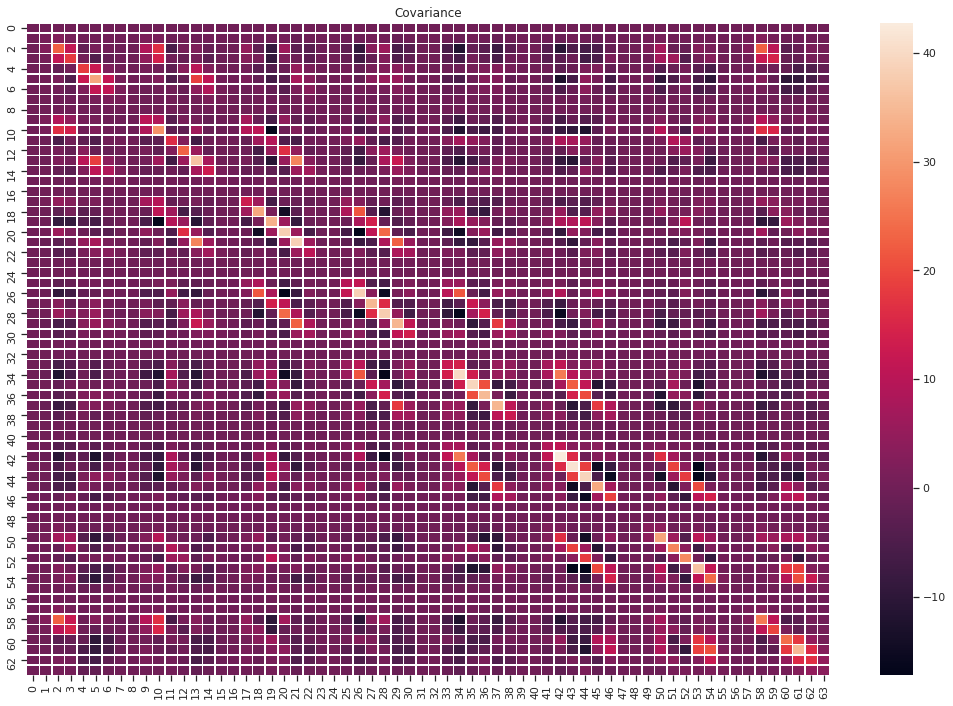

In [201]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_x.corr(), linewidths=.5, ax=ax)
ax.set_title('Correlation')

f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_x.cov(), linewidths=.5, ax=ax)
ax.set_title('Covariance')

# Varaince of the features

In [202]:
fig = go.Figure([go.Bar(x=np.arange(0,len(S_x)),
                        y=np.diag(S_x))])
fig.update_layout(
    title='Variance of the features',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Variance',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

# Sample from data

Text(0.5, 1.0, 'Covariance (sampled)')

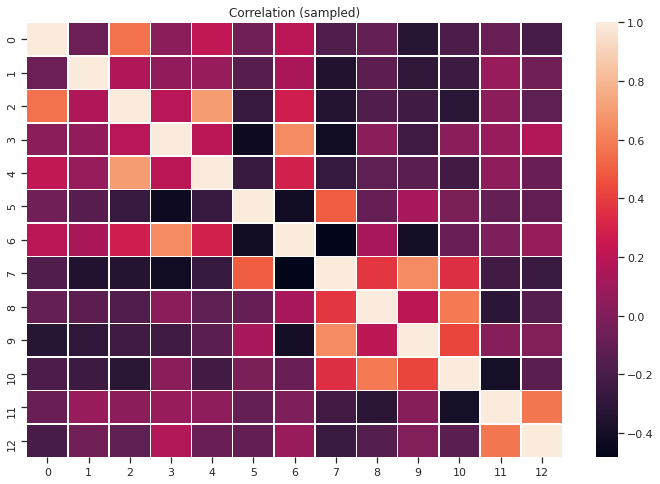

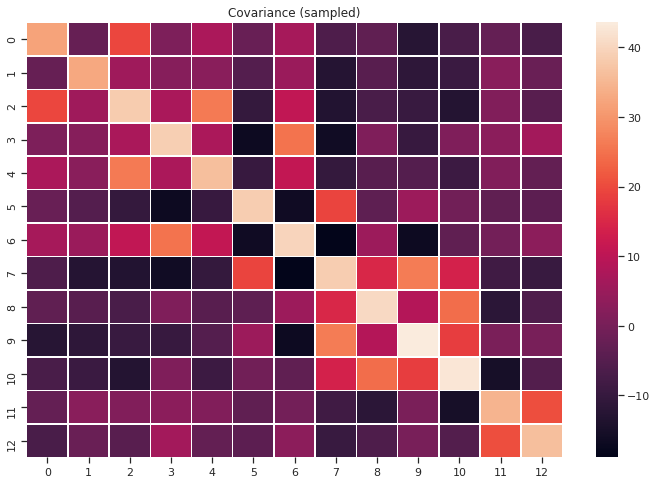

In [208]:
np.random.seed(0)
features_selected = [5,10,13,20,21,26,28,34,35,42,43,53,61]
#features_selected = np.random.uniform(0,64,15).astype(int)
df_xp = df_x.loc[np.random.uniform(0,1797,300).astype(int), features_selected ]
features = df_xp.columns
df_xp.columns = np.arange(1, df_xp.shape[1]+1)

df_xp.columns = range(df_xp.shape[1])

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_xp.corr(), linewidths=.5, ax=ax)
ax.set_title('Correlation (sampled)')

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_xp.cov(), linewidths=.5, ax=ax)
ax.set_title('Covariance (sampled)')



In [209]:
fig = go.Figure([go.Bar(x=df_xp.columns,
                        y=np.diag(df_xp.cov()))])
fig.update_layout(
    title='Variance of the features (sampled)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Variance',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

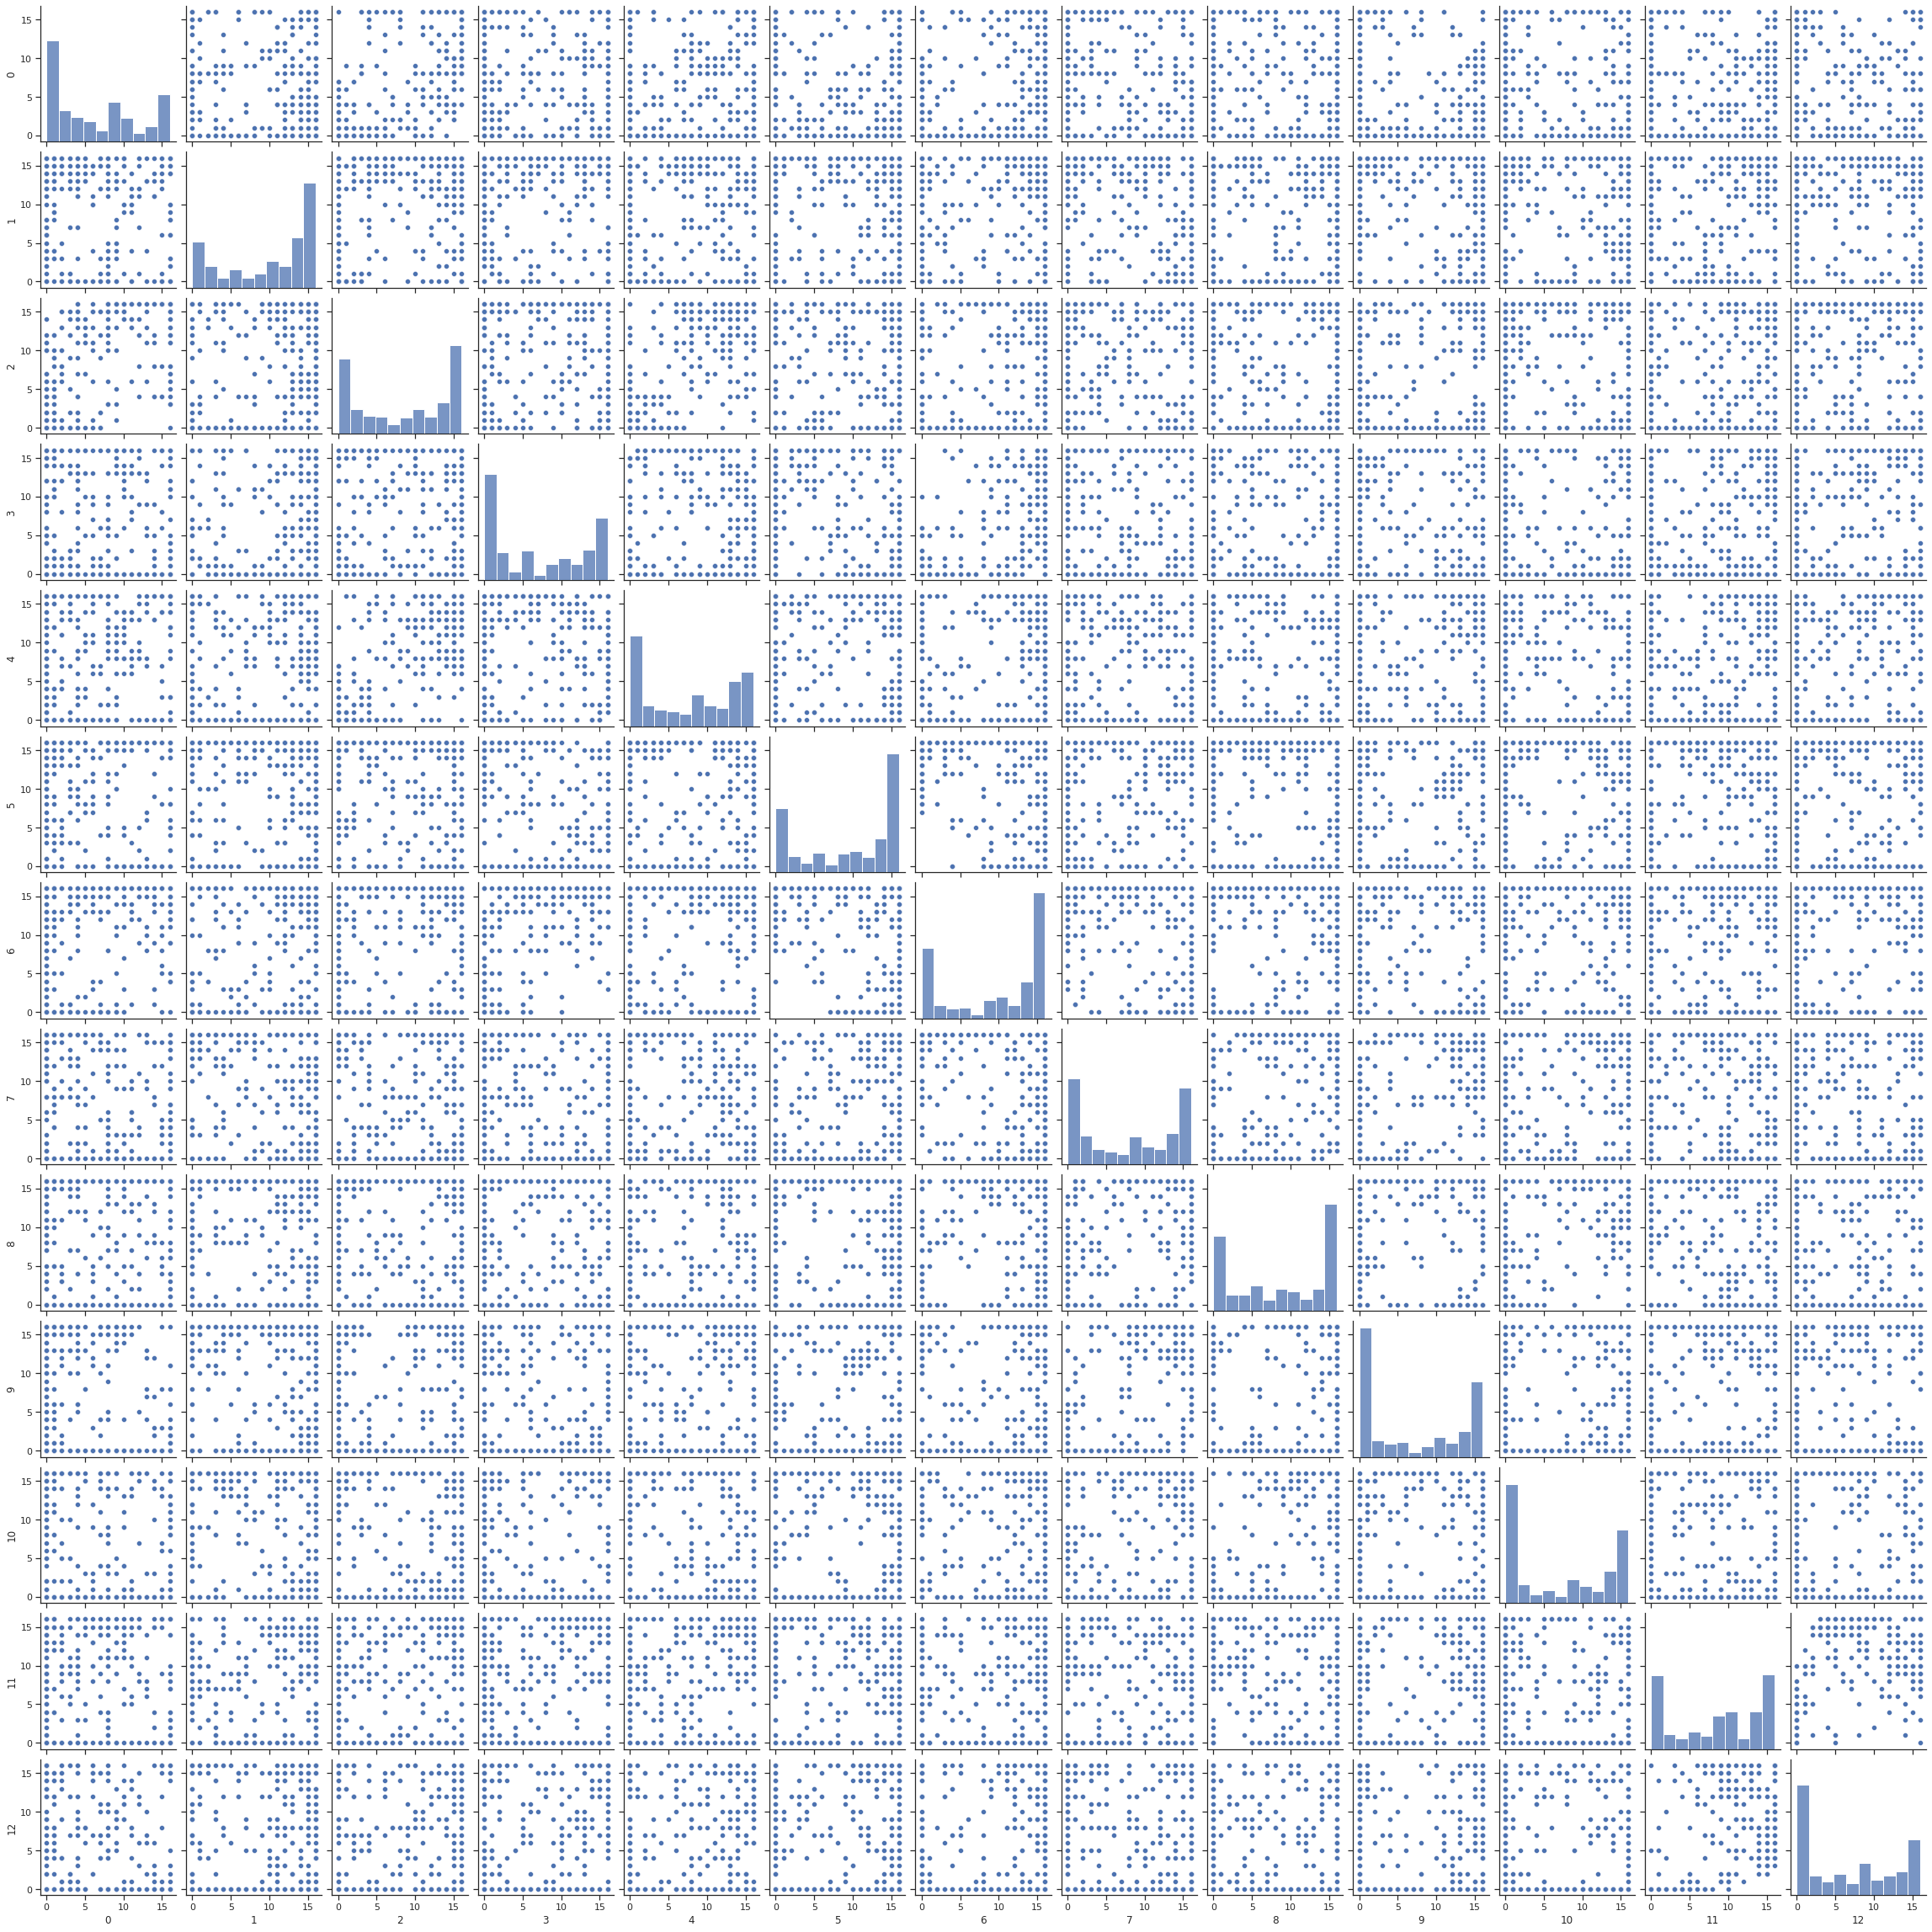

In [210]:
sns.pairplot(df_xp)

In [ ]:
L = cholesky(pd.DataFrame(data=df_xp).cov())

# Create random variables

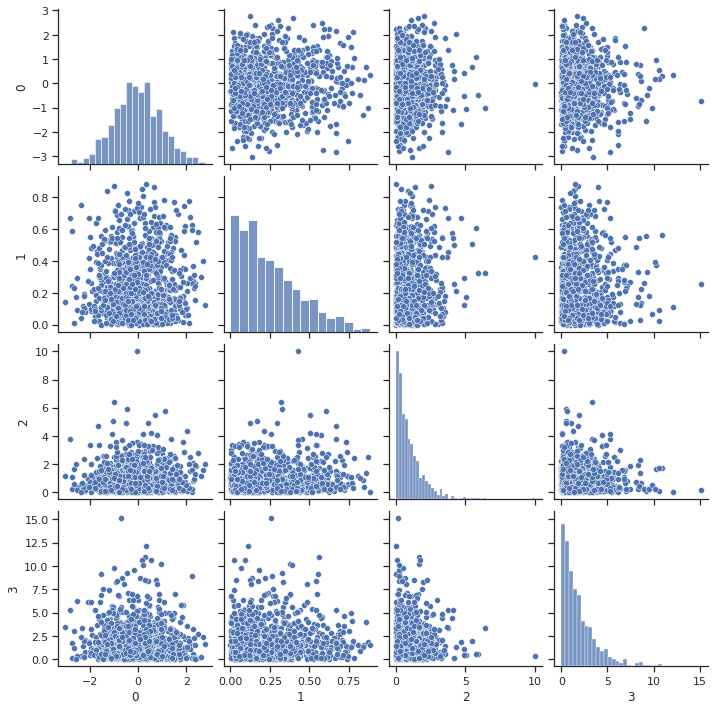

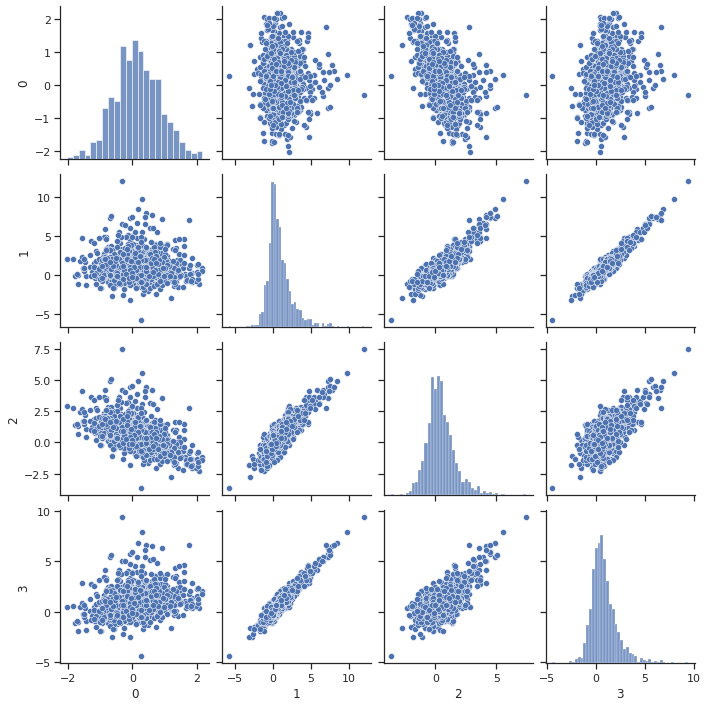

In [186]:
p = 5
m = 1000

np.random.seed(0)

X1 = np.random.normal(0,1,(m,1))
X2 = np.random.beta(1,3,(m,1))
X3 = np.random.gamma(1,1,(m,1))
X4 = np.random.gamma(1,2,(m,1))

ro = 0.7
Y1 = ro*X1 + X2*np.sqrt(1-ro**2)
ro2 = -0.6
Y2 = ro2*X3 + X4*np.sqrt(1-ro2**2)

ro3 = -0.8
Y3 = ro3*Y1 + Y2*np.sqrt(1-ro3**2)

ro4 = 0.6
Y4 = ro4*Y1 + Y2*np.sqrt(1-ro4**2)

dfX = pd.DataFrame(data=np.concatenate([X1, X2, X3, X4], axis=1))

dfY = pd.DataFrame(data=np.concatenate([Y1, Y2, Y3, Y4], axis=1))


sns.pairplot(dfX)

sns.pairplot(dfY)

# Covariance matrix

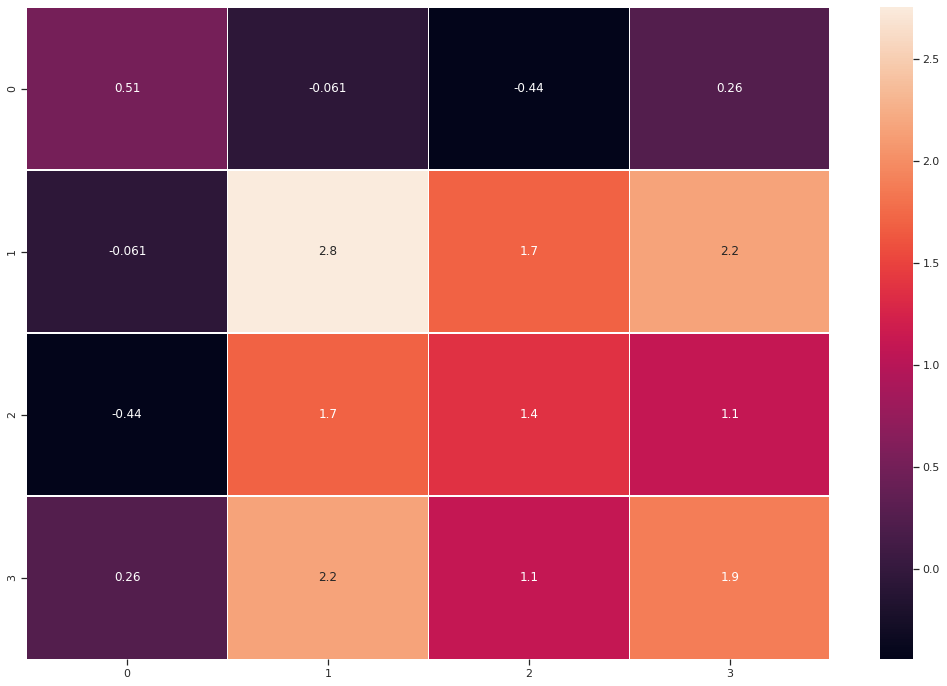

In [187]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(dfY.cov(), annot=True, linewidths=.5, ax=ax)

# Correlation matrix

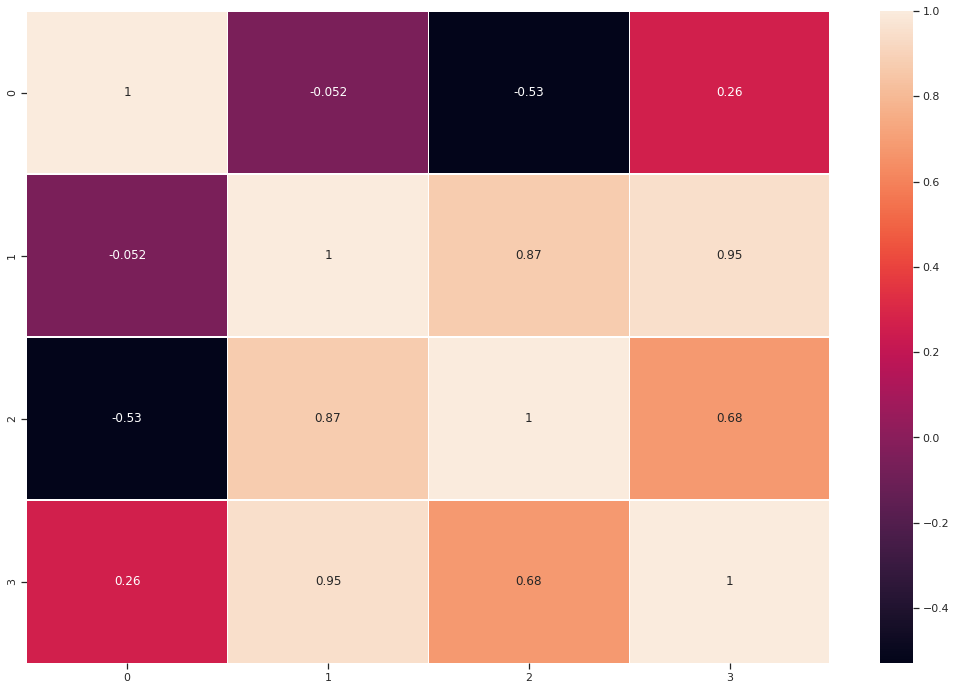

In [189]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(dfY.corr(), annot=True, linewidths=.5, ax=ax)

# Create covariance matrix given correlation matrix

$$S = diag(s) \cdot R \cdot diag(s)$$

where $s$ is the variance vector

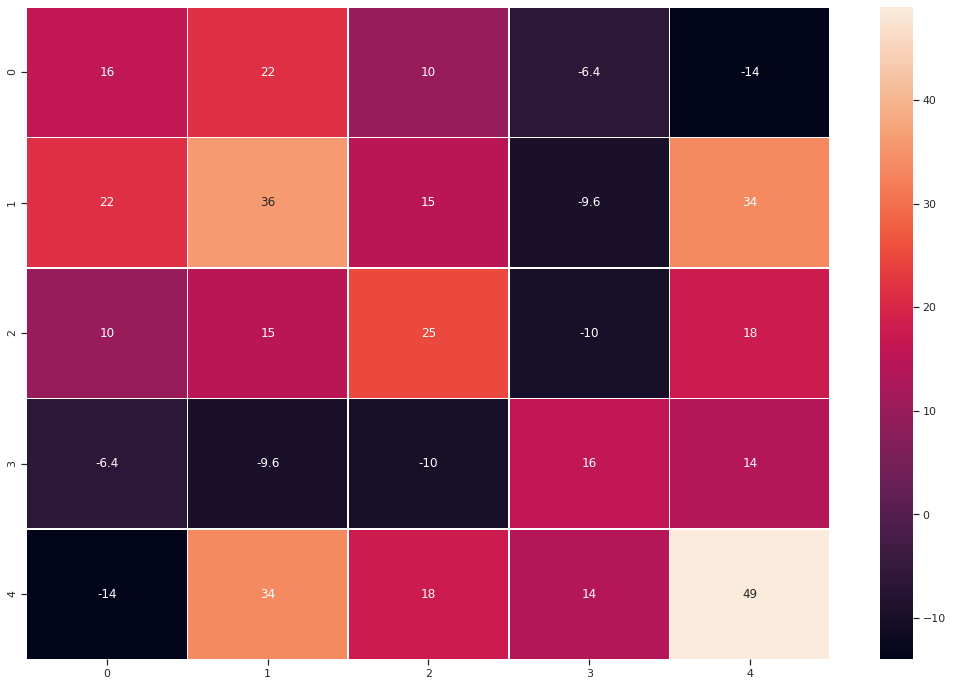

In [197]:
s = np.array([4, 6, 5, 4, 7])
#s = np.diag(df_Y.values) 

R = np.array([( 1.0, 0.9, 0.5,-0.4,-0.5 ),( 0.9, 1.0, 0.5,-0.4, 0.8),
              ( 0.5, 0.5, 1.0,-0.5, 0.5), (-0.4,-0.4,-0.5, 1.0, 0.5), (-0.5, 0.8, 0.5, 0.5, 1.0)])

Sp = pd.DataFrame(data=np.dot(np.dot(np.diag(s),R),np.diag(s)))

f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(Sp, annot=True, linewidths=.5, ax=ax)


# Principal Componenent Analysis (PCA)


In [228]:
from sklearn.decomposition import PCA
model_PCA = PCA(n_components=5, random_state=0)
X_PCA = model_PCA.fit_transform(df_xp.values)
print('reduced dimension:', X_PCA.shape)
print('Explained variance:', model_PCA.explained_variance_)
print('Explained variance ratio:', model_PCA.explained_variance_ratio_)
print('Noise variance:', model_PCA.noise_variance_)  #estimated noise covariance following the Probabilistic PCA model f

explained_variance = np.diag(pd.DataFrame(data=X_PCA).cov())/np.diag(df_xp.cov()).sum()
print('Explained variance (calculated):', explained_variance)

reduced dimension: (300, 5)
Explained variance: [143.12450332  80.22009312  66.88271334  48.12979376  33.73723984]
Explained variance ratio: [0.29039261 0.16276264 0.13570175 0.09765299 0.06845121]
Noise variance: 15.096396877610346
Explained variance (calculated): [0.29039261 0.16276264 0.13570175 0.09765299 0.06845121]


# Incremental PCA

In [248]:
from sklearn.decomposition import IncrementalPCA
model_IPCA = IncrementalPCA(n_components=5)
X_IPCA = model_IPCA.fit_transform(df_xp.values)
print('reduced dimension:', X_IPCA.shape)
print('Explained variance:', model_IPCA.explained_variance_)
print('Explained variance ratio:', model_IPCA.explained_variance_ratio_)
print('Noise variance:', model_IPCA.noise_variance_)  #estimated noise covariance following the Probabilistic PCA model f

explained_variance = np.diag(pd.DataFrame(data=X_IPCA).cov())/np.diag(df_xp.cov()).sum()
print('Explained variance (calculated):', explained_variance)

reduced dimension: (300, 5)
Explained variance: [142.91753902  80.1195894   66.74915411  46.95753849  31.59047958]
Explained variance ratio: [0.28997269 0.16255872 0.13543076 0.09527455 0.06409554]
Noise variance: 2.2952726334329068
Explained variance (calculated): [0.29034917 0.16273109 0.13567964 0.09683288 0.06643312]


#  Independent Component Analysis (ICA)

Transform the original data set with 64 features to 7

In [247]:
model_ICA = FastICA(n_components=5, random_state=0)
X_ICA = model_ICA.fit_transform(df_xp.values)
print('reduced dimension:', X_ICA.shape)
explained_variance = np.diag(pd.DataFrame(data=X_ICA).cov())/np.diag(df_xp.cov()).sum()
print('Explained variance (calculated):', explained_variance)

reduced dimension: (300, 5)
Explained variance (calculated): [6.78578939e-06 6.78578939e-06 6.78578939e-06 6.78578939e-06
 6.78578939e-06]


In [220]:
#sns.pairplot(pd.DataFrame(data=X_ICA))

# Factor Analysis 
simple linear generative model with Gaussian latent variables.
Transform the original data set with 64 features to 7

In [246]:
from sklearn.decomposition import FactorAnalysis
model_FA = FactorAnalysis(n_components=5, random_state=0)
X_FA = model_FA.fit_transform(df_xp.values)
print('reduced dimension:', X_FA.shape)
explained_variance = np.diag(pd.DataFrame(data=X_FA).cov())/np.diag(df_xp.cov()).sum() 
print('Explained variance (calculated):', explained_variance)

reduced dimension: (300, 5)
Explained variance (calculated): [0.00201723 0.00199411 0.00185103 0.001687   0.00149057]


In [221]:
#sns.pairplot(pd.DataFrame(data=X_FA))

# Non-Negative Matrix Factorization (NMF)
 Find two non-negative matrices (W, H) whose product approximates the non- negative matrix X.
    This factorization can be used for example for dimensionality reduction, source separation or topic extraction.

In [245]:
from sklearn.decomposition import NMF
model_NMF = NMF(n_components=5, init='random', random_state=0)
X_NMF = model_NMF.fit_transform(np.abs(df_xp.values))
print('reduced dimension:', X_NMF.shape)

explained_variance = np.diag(pd.DataFrame(data=X_NMF).cov())/np.diag(df_xp.cov()).sum() 
print('Explained variance (calculated):', explained_variance)

reduced dimension: (300, 5)
Explained variance (calculated): [0.00455022 0.00376031 0.00280286 0.00257777 0.00392858]


In [234]:
#sns.pairplot(pd.DataFrame(data=X_NMF))

# Kernel 
Non-linear dimensionality reduction through the use of kernels

In [244]:
from sklearn.decomposition import KernelPCA
model_kernel = KernelPCA(n_components=5, kernel='linear') # kernels: “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”
X_kernel = model_kernel.fit_transform(df_xp.values)
print('reduced dimension:', X_kernel.shape)

explained_variance = np.diag(pd.DataFrame(data=X_kernel).cov())/np.diag(df_xp.cov()).sum() 
print('Explained variance (calculated):', explained_variance)

reduced dimension: (300, 5)
Explained variance (calculated): [0.29039261 0.16276264 0.13570175 0.09765299 0.06845121]


In [239]:
#sns.pairplot(pd.DataFrame(data=X_kernel))

# Latent Dirichlet Allocation (LDA)

In [240]:
from sklearn.decomposition import LatentDirichletAllocation
model_LDA = LatentDirichletAllocation(n_components=5) # kernels: “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”
X_LDA = model_LDA.fit_transform(df_xp.values)
print('reduced dimension:', X_LDA.shape)

explained_variance = np.diag(pd.DataFrame(data=X_LDA).cov())/np.diag(df_xp.cov()).sum() 
print('Explained variance (calculated):', explained_variance)

reduced dimension: (300, 5)
Explained variance (calculated): [0.0001369  0.00011108 0.00022337 0.0001684  0.00021662]


# Comparative

In [280]:
df1 = pd.DataFrame(data=X_PCA, index = 1*np.ones((np.shape(X_PCA)[0])))
df2 = pd.DataFrame(data=X_IPCA, index = 2*np.ones((np.shape(X_IPCA)[0])))
df3 = pd.DataFrame(data=X_ICA, index = 3*np.ones((np.shape(X_ICA)[0])))
df4 = pd.DataFrame(data=X_FA, index = 4*np.ones((np.shape(X_FA)[0])))
df5 = pd.DataFrame(data=X_NMF, index = 5*np.ones((np.shape(X_NMF)[0])))
df6 = pd.DataFrame(data=X_kernel, index = 6*np.ones((np.shape(X_kernel)[0])))
df7 = pd.DataFrame(data=X_LDA, index = 7*np.ones((np.shape(X_LDA)[0])))

In [290]:
df8 = pd.concat([df1,df2,df3,df4,df5,df6,df7])
df8['label'] = df8.index
df8['label']  = df8['label'].astype(int)
df8['label'] = df8['label'].map({1:'PCA', 2:'IPCA',3:'ICA',4:'FA',5:'NMF',6:'K',7:'LDA'})
df8.reset_index(drop=True, inplace=True)

,0,1,2,3,4,label
0,-4.679429,6.830880,19.068361,-9.775640,-1.753556,PCA
1,-4.390396,-7.878505,-6.263836,-6.057496,-6.189751,PCA
2,13.348810,14.257000,-4.285914,1.797908,6.272611,PCA
3,-12.815524,3.066429,14.574332,-4.936313,-4.472016,PCA
4,-9.259056,12.131454,4.101858,8.036507,-7.358078,PCA
...,...,...,...,...,...,...
2095,0.003494,0.884862,0.003445,0.104739,0.003460,LDA
2096,0.001926,0.001938,0.001912,0.169498,0.824727,LDA
2097,0.002314,0.136374,0.618903,0.240115,0.002294,LDA
2098,0.001736,0.001745,0.287701,0.707088,0.001731,LDA


In [291]:
fig = px.scatter_matrix(df8,
    dimensions=[0, 1, 2, 3,4],
    color="label")
fig.show()